In [1]:
# Malignent is 1 and Beniegn is -1
def number_classify(diagnosis:str):
    if diagnosis == 'M': 
        return 1
    else: #diagnosis == "B"
        return -1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import Classifier

df = pd.read_csv('Cancer_Data.csv', usecols=[1,2,3,4])
df = df.sample(frac=1).reset_index(drop=True)
df['numb_Diagnosis'] = df['diagnosis'].apply(number_classify)

perim_max = df['perimeter_mean'].max()
radius_max = df['radius_mean'].max()
texture_Max = df['texture_mean'].max()

df['texture_mean'] /= texture_Max
df['perimeter_mean'] /= perim_max 
df['radius_mean'] /= radius_max


ratio: float = 0.80
split: int = int(ratio * len(df))
learning_df = df[:split]
testing_df = df[split:]

learning_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,numb_Diagnosis
0,B,0.447528,0.468432,0.423501,-1
1,M,0.574884,0.548371,0.563395,1
2,B,0.599075,0.495418,0.575066,-1
3,B,0.413376,0.462831,0.405199,-1
4,B,0.464248,0.491599,0.438249,-1
5,B,0.586980,0.465631,0.565517,-1
6,B,0.292387,0.526986,0.282599,-1
7,B,0.412665,0.467413,0.391936,-1
8,M,0.487727,0.530295,0.478515,1
9,B,0.498755,0.398676,0.475279,-1


In [3]:
cancer_Primal_SVM = Classifier.Regularized_SVM(['radius_mean', 'texture_mean'], 'numb_Diagnosis')
cancer_Primal_SVM.Train_Model(learning_df,500,0.01, 0.001)
print(cancer_Primal_SVM.Weights)

[9.7075959  3.15766013]


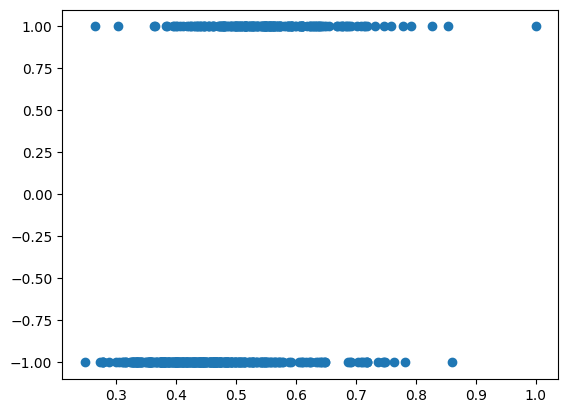

In [4]:
plot.scatter(df['texture_mean'], df['numb_Diagnosis'])

In [5]:
print(cancer_Primal_SVM.Test_Model(testing_df))
print(cancer_Primal_SVM.Predict_Class([0.59, 0.3]))

0.9122807017543859
-1.0
